## Параллельный расчет с Dask
https://dask.org/

In [1]:
# 

from distributed import Client, LocalCluster

cl = Client(LocalCluster(n_workers=16, threads_per_worker=1))
cl

<Client: 'tcp://127.0.0.1:56030' processes=16 threads=16, memory=15.88 GiB>

In [3]:
# Функция для параллельного расчета
import numpy as np
import random
from tqdm import *

def foo(geom_kr, geom_op, geom_korp):
    from NAVIver2 import Target, Rocket
    import time
        
    targel = Target(3000, 3500, 320)
    rockk = Rocket(targel.y, targel.x, geom_kr, geom_op, geom_korp)
    # time.sleep(np.random.random())
    return rockk.navigation(targel)

def da_fit(rest):
    maxis = 0
    summF = 0
    for i in range(len(rest)):
        summF += rest[i]
        if maxis <= rest[i]:
            maxis = rest[i]
    ans = np.zeros(len(rest))
    for i in range(len(rest)):
        ans[i] = rest[i] / summF
    return ans

def crosss(pipi):
    krils, opers, korps, kri1, op1, korp1 = [], [], [], [], [], []
    for i in range(len(pipi)):
        krils.append(pipi[i][1])
        opers.append(pipi[i][2])
        korps.append(pipi[i][3])
    for i in range(len(krils[0])):
        kri1.append(krils[random.randint(0,1)][i])
        op1.append(opers[random.randint(0,1)][i])
    for i in range(len(korps[0])):
        korp1.append(korps[random.randint(0,1)][i])
    chichi = [0, kri1, op1, korp1]
    return chichi
        

def da_new(croms):
    croms.sort()
    parent = croms[int(len(results)/2):]
    child = []
    # лучший родитель
    
    child.append(parent[len(parent) - 1])
    for i in range(10):
        pap_mam = [parent[0], parent[random.randint(0, int(len(parent) - 1))]]
        child.append(crosss(pap_mam))
    # дети лучших родителей    
    for i in range(int(len(croms) - 51)):
        pap_mam = [parent[random.randint(0, int(len(parent) - 1))], parent[random.randint(0, int(len(parent) - 1))]]
        child.append(crosss(pap_mam))
    
    # один рандомный мутант
    
    for i in range(40):
        params_kr1 = np.zeros(5)
        params_op1 = np.zeros(5)
        params_kr1[0] = random.uniform(0.06, 0.115)
        params_kr1[1] = random.uniform(0.002336, 0.010564)
        params_kr1[2] = random.uniform(0.075, 0.105)
        params_kr1[4] = random.uniform(0, 0.032)
        if params_kr1[1] >= (params_kr1[0] * params_kr1[2]):
            params_kr1[1] = params_kr1[0] * params_kr1[2]
        elif params_kr1[1] <= (params_kr1[0] * params_kr1[2] * 3 / 4):
            params_kr1[1] = params_kr1[0] * params_kr1[2] * 3 / 4
        params_op1[0] = random.uniform(0.06, 0.18)
        params_op1[1] = random.uniform(0.002, 0.0052)
        params_op1[2] = random.uniform(0.02, 0.034)
        params_op1[4] = random.uniform(0.328, 0.356) 
        if params_op1[1] >= (params_op1[0] * params_op1[2]):
            params_op1[1] = params_op1[0] * params_op1[2]
        elif params_op1[1] <= (params_op1[0] * params_op1[2] * 3 / 4):
            params_op1[1] = params_op1[0] * params_op1[2] * 3 / 4
        params_krop1 = np.array([0.0974, 0.050, 0.160])
        mutant = [0, params_kr1, params_op1, params_krop1]
        child.append(mutant)
    
    return child

    

In [3]:
"""# заполнение параметров

# параметры крыльев
params_kr = np.array([[0.096, 0.008912, 0.10568, 0, 0.015], 
                     [0.04, 0.0022, 0.065, 0, 0.015],
                     [0.115, 0.010564, 0.105, 0, 0.015],
                     [0.098, 0.00917336, 0.10568, 0, 0.015]])

# ограничение по длине: 0.04...0.115
# ограничение по площади: 0.002336 ... 0.010564
# ограничение по бортовой хорде: 0.065 ... 0.105
# ограничение по расстоянию до кормового среза: 0.0 ... 0.032
# 

# параметры рулей
params_op = np.array([[0.17824, 0.0055380742, 0.03214, 0, 0.35], 
                      [0.005, 0.002, 0.02, 0, 0.35], 
                      [0.18, 0.0052, 0.034, 0, 0.35],
                      [0.12576, 0.0038426, 0.034, 0, 0.35]])

# ограничение по длине: 0.05...0.18
# ограничение по площади: 0.002 ... 0.0052
# ограничение по корневой хорде: 0.02 ... 0.034
# ограничение по расстоянию от носика: 0.328 ... 0.0356
# 

# параметры корпуса
params_korp = np.array([[0.0974, 0.050, 0.160], 
                        [0.0974, 0.050, 0.160], 
                        [0.0974, 0.050, 0.160],
                        [0.0974, 0.050, 0.160]])
# params_x = ([3000, 3000, 3000, 3000])
# params_y = ([3500, 3500, 3500, 3500])
# params_v = np.array([320, 320, 320, 320])"""

chromosom = 512
params_kr = np.zeros((chromosom, 5))

params_op = np.zeros((chromosom, 5))

params_korp = np.zeros((chromosom, 3))
#params_kr = np.array([[0.096, 0.008912, 0.10568, 0, 0.015],
#                     [0.04, 0.0022, 0.065, 0, 0.015],
#                     [0.115, 0.010564, 0.105, 0, 0.015],
#                     [0.098, 0.00917336, 0.10568, 0, 0.015]])

# ограничение по длине: 0.06...0.115
# ограничение по площади: 0.002336 ... 0.010564
# ограничение по бортовой хорде: 0.075 ... 0.105
# ограничение по расстоянию до кормового среза: 0.0 ... 0.032

# ограничение по длине: 0.06...0.18
# ограничение по площади: 0.002 ... 0.0052
# ограничение по корневой хорде: 0.02 ... 0.034
# ограничение по расстоянию от носика: 0.328 ... 0.0356
for i in range(chromosom):
    params_kr[i][0] = random.uniform(0.06, 0.115)
    params_kr[i][1] = random.uniform(0.002336, 0.010564)
    params_kr[i][2] = random.uniform(0.075, 0.105)
    params_kr[i][4] = random.uniform(0, 0.032)
    if params_kr[i][1] >= (params_kr[i][0] * params_kr[i][2]):
        params_kr[i][1] = params_kr[i][0] * params_kr[i][2]
    elif params_kr[i][1] <= (params_kr[i][0] * params_kr[i][2] * 3 / 4):
        params_kr[i][1] = params_kr[i][0] * params_kr[i][2] * 3 / 4
    params_op[i][0] = random.uniform(0.06, 0.18)
    params_op[i][1] = random.uniform(0.002, 0.0052)
    params_op[i][2] = random.uniform(0.02, 0.034)
    params_op[i][4] = random.uniform(0.328, 0.356)
    if params_op[i][1] >= (params_op[i][0] * params_op[i][2]):
        params_op[i][1] = params_op[i][0] * params_op[i][2]
    elif params_op[i][1] <= (params_op[i][0] * params_op[i][2] * 3 / 4):
        params_op[i][1] = params_op[i][0] * params_op[i][2] * 3 / 4
    params_korp[i][0] = 0.0974
    params_korp[i][1] = 0.050
    params_korp[i][2] = 0.160

In [4]:
futures = cl.map(foo, params_kr, params_op, params_korp, pure=False)

In [5]:
futures

[<Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-0>,
 <Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-1>,
 <Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-2>,
 <Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-3>,
 <Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-4>,
 <Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-5>,
 <Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-6>,
 <Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-7>,
 <Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-8>,
 <Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-9>,
 <Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-10>,
 <Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-11>,
 <Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-12>,
 <Future: pending, key: foo-f40ff017-0f6b-40c5-aaba-27a8b2a91a4b-13>,
 <Future: pending, key: foo-f4

In [6]:
results = cl.gather(futures)

In [7]:
results

[0.019473176164342167,
 0.023984486419980373,
 0.04590954369764613,
 0.030529285946724362,
 0.020777675474014736,
 0.01897805723569304,
 0.012932403748031304,
 0.041687261021739676,
 0.010139213128672822,
 0.020205437014156568,
 0.20248092943263557,
 0.06498846421622465,
 0.009623744548670786,
 0.019047422880782844,
 0.017142708914346345,
 0.021462525324332488,
 0.020660852420111227,
 0.022836226139699437,
 0.006671115919169372,
 0.02442506067380773,
 0.019325695262043193,
 0.1527252927621732,
 0.030509468178026914,
 0.05172604242913719,
 0.023879996560889537,
 0.009600086380177812,
 0.010805849125062912,
 0.02174380686612573,
 0.02571172219629524,
 0.02127254899011452,
 0.018380869222320465,
 0.016026434987041222,
 0.003000371022089345,
 0.02414386075334086,
 0.014414319127093532,
 0.02061052273679388,
 0.015303654830725372,
 0.0190156141189196,
 0.04262555166960681,
 0.023873062130780793,
 0.007691448609369545,
 0.021605256935180766,
 0.0015144695598890087,
 0.015873830911529316,
 0.

In [8]:
for tick in tqdm(range(40)):

    dab = da_fit(results)

    summs = 0
    for i in range(len(results)):
        summs += dab[i]
    kris = summs / len(results)
    
    croms = []
    for i in range(len(results)):
        # croms.append([dab[i], params_kr[i], params_op[i], params_korp[i]])
        #print(dab[i], params_kr[i], params_op[i], params_korp[i])
        #print()
        
        croms.append([results[i], params_kr[i], params_op[i], params_korp[i]])
    croms.sort()
    # croms
    print(croms[int(len(croms) - 1)])
    chicha = da_new(croms)
    # for i in range(len(chicha)):
        # print(chicha[i])
        # print()
    
    params_kr, params_op, params_korp = [], [], []
    for i in range(len(chicha)):
        params_kr.append(chicha[i][1])
        params_op.append(chicha[i][2])
        params_korp.append(chicha[i][3])
    
    # print(results)
    # print(params_kr[0], params_op[0])

    futures = cl.map(foo, params_kr, params_op, params_korp, pure=False)
    results = cl.gather(futures)
        
    

  0%|                                                                                           | 0/40 [00:00<?, ?it/s]

[486547.6359486667, array([0.09894741, 0.00921931, 0.09717829, 0.        , 0.02753215]), array([0.15884749, 0.00387247, 0.03250472, 0.        , 0.33914563]), array([0.0974, 0.05  , 0.16  ])]


  2%|██                                                                                 | 1/40 [00:51<33:35, 51.69s/it]

[5820451.194527648, [0.07215556511914509, 0.004588558780116624, 0.0974640466814082, 0.0, 0.0029640827636913765], [0.09111844643825144, 0.0016224909296623105, 0.026431398851147182, 0.0, 0.3296422680902869], [0.0974, 0.05, 0.16]]


  5%|████▏                                                                              | 2/40 [01:44<32:59, 52.10s/it]

[5820451.194527648, [0.07215556511914509, 0.004588558780116624, 0.0974640466814082, 0.0, 0.0029640827636913765], [0.09111844643825144, 0.0016224909296623105, 0.026431398851147182, 0.0, 0.3296422680902869], [0.0974, 0.05, 0.16]]


  8%|██████▏                                                                            | 3/40 [02:35<31:56, 51.80s/it]

[4574828405.054309, [0.09736554720362345, 0.004861343535823432, 0.09743544400535192, 0.0, 0.021001376608996057], [0.11003162357153795, 0.0025295092450147716, 0.02474205752964052, 0.0, 0.33053129466425524], [0.0974, 0.05, 0.16]]


 10%|████████▎                                                                          | 4/40 [03:25<30:46, 51.30s/it]

[98190461213.36319, [0.06665758939573699, 0.009219313560490976, 0.0974640466814082, 0.0, 0.0066955187592618376], [0.07175776847712664, 0.003444806352766992, 0.03255807801469878, 0.0, 0.3296422680902869], [0.0974, 0.05, 0.16]]


 12%|██████████▍                                                                        | 5/40 [04:13<29:13, 50.10s/it]

[98190461213.36319, [0.06665758939573699, 0.009219313560490976, 0.0974640466814082, 0.0, 0.0066955187592618376], [0.07175776847712664, 0.003444806352766992, 0.03255807801469878, 0.0, 0.3296422680902869], [0.0974, 0.05, 0.16]]


 15%|████████████▍                                                                      | 6/40 [04:57<27:27, 48.47s/it]

[98190461213.36319, [0.06665758939573699, 0.009219313560490976, 0.0974640466814082, 0.0, 0.0066955187592618376], [0.07175776847712664, 0.003444806352766992, 0.03255807801469878, 0.0, 0.3296422680902869], [0.0974, 0.05, 0.16]]


 18%|██████████████▌                                                                    | 7/40 [05:43<26:08, 47.53s/it]

[3700887322490.0674, [0.10637338724996795, 0.008463230164602166, 0.09717828929871589, 0.0, 0.02772430770125607], [0.07175776847712664, 0.003444806352766992, 0.03371153219456564, 0.0, 0.33603050325042805], [0.0974, 0.05, 0.16]]


 20%|████████████████▌                                                                  | 8/40 [06:28<24:57, 46.80s/it]

[3700887322490.0674, [0.10637338724996795, 0.008463230164602166, 0.09717828929871589, 0.0, 0.02772430770125607], [0.07175776847712664, 0.003444806352766992, 0.03371153219456564, 0.0, 0.33603050325042805], [0.0974, 0.05, 0.16]]


 22%|██████████████████▋                                                                | 9/40 [07:13<23:51, 46.18s/it]

[736042407670708.4, [0.10504162600818542, 0.007876442599714394, 0.09721180130462417, 0.0, 0.005699870592925364], [0.09243584255411247, 0.0030532101949342716, 0.03369632383668777, 0.0, 0.3453721349300023], [0.0974, 0.05, 0.16]]


 25%|████████████████████▌                                                             | 10/40 [07:58<22:57, 45.93s/it]

[1.329525733400252e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.021001376608996057], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3453721349300023], [0.0974, 0.05, 0.16]]


 28%|██████████████████████▌                                                           | 11/40 [08:43<22:03, 45.65s/it]

[1.329525733400252e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.021001376608996057], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3453721349300023], [0.0974, 0.05, 0.16]]


 30%|████████████████████████▌                                                         | 12/40 [09:28<21:15, 45.55s/it]

[1.329525733400252e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.021001376608996057], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3453721349300023], [0.0974, 0.05, 0.16]]


 32%|██████████████████████████▋                                                       | 13/40 [10:13<20:21, 45.24s/it]

[1.329525733400252e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.021001376608996057], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3453721349300023], [0.0974, 0.05, 0.16]]


 35%|████████████████████████████▋                                                     | 14/40 [10:57<19:31, 45.07s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 38%|██████████████████████████████▊                                                   | 15/40 [11:42<18:42, 44.92s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 40%|████████████████████████████████▊                                                 | 16/40 [12:27<17:56, 44.87s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 42%|██████████████████████████████████▊                                               | 17/40 [13:11<17:09, 44.77s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 45%|████████████████████████████████████▉                                             | 18/40 [13:56<16:24, 44.77s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 48%|██████████████████████████████████████▉                                           | 19/40 [14:41<15:39, 44.75s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 50%|█████████████████████████████████████████                                         | 20/40 [15:26<14:57, 44.85s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 52%|███████████████████████████████████████████                                       | 21/40 [16:11<14:12, 44.87s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 55%|█████████████████████████████████████████████                                     | 22/40 [16:56<13:29, 44.96s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 57%|███████████████████████████████████████████████▏                                  | 23/40 [17:41<12:44, 44.95s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 60%|█████████████████████████████████████████████████▏                                | 24/40 [18:27<12:02, 45.18s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 62%|███████████████████████████████████████████████████▎                              | 25/40 [19:12<11:17, 45.19s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 65%|█████████████████████████████████████████████████████▎                            | 26/40 [19:57<10:31, 45.08s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 68%|███████████████████████████████████████████████████████▎                          | 27/40 [20:42<09:46, 45.10s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 70%|█████████████████████████████████████████████████████████▍                        | 28/40 [21:27<09:00, 45.08s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 72%|███████████████████████████████████████████████████████████▍                      | 29/40 [22:12<08:15, 45.02s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 75%|█████████████████████████████████████████████████████████████▌                    | 30/40 [22:57<07:30, 45.07s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 78%|███████████████████████████████████████████████████████████████▌                  | 31/40 [23:42<06:46, 45.22s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 80%|█████████████████████████████████████████████████████████████████▌                | 32/40 [24:28<06:02, 45.34s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 82%|███████████████████████████████████████████████████████████████████▋              | 33/40 [25:15<05:20, 45.76s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 85%|█████████████████████████████████████████████████████████████████████▋            | 34/40 [26:05<04:42, 47.09s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 88%|███████████████████████████████████████████████████████████████████████▊          | 35/40 [26:54<03:58, 47.70s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 90%|█████████████████████████████████████████████████████████████████████████▊        | 36/40 [27:40<03:08, 47.24s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 92%|███████████████████████████████████████████████████████████████████████████▊      | 37/40 [28:28<02:21, 47.29s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 38/40 [29:15<01:34, 47.32s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 39/40 [30:02<00:47, 47.13s/it]

[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [30:49<00:00, 46.23s/it]


In [9]:
dab = da_fit(results)

summs = 0
for i in range(len(results)):
    summs += dab[i]
kris = summs / len(results)

croms = []
for i in range(len(results)):
    croms.append([results[i], params_kr[i], params_op[i], params_korp[i]])
croms.sort()
croms

[[0.004352967932988859,
  array([0.11095456, 0.00826434, 0.09931206, 0.        , 0.03009944]),
  array([0.10328104, 0.00262249, 0.02539174, 0.        , 0.34674393]),
  array([0.0974, 0.05  , 0.16  ])],
 [0.00447449163843458,
  array([0.08332265, 0.00621794, 0.09949985, 0.        , 0.01092878]),
  array([0.13408561, 0.0022299 , 0.02217388, 0.        , 0.32866904]),
  array([0.0974, 0.05  , 0.16  ])],
 [0.006821911993815741,
  array([0.11046975, 0.01052279, 0.10206799, 0.        , 0.0201275 ]),
  array([0.10350643, 0.00224963, 0.02173417, 0.        , 0.33182755]),
  array([0.0974, 0.05  , 0.16  ])],
 [0.007066238671623727,
  array([0.07582293, 0.00573048, 0.10076947, 0.        , 0.02136017]),
  array([0.08979492, 0.0019646 , 0.02187879, 0.        , 0.35511116]),
  array([0.0974, 0.05  , 0.16  ])],
 [0.0070907606162361695,
  array([0.07308743, 0.00561261, 0.10239078, 0.        , 0.00119485]),
  array([0.14827636, 0.00308019, 0.0207733 , 0.        , 0.35063394]),
  array([0.0974, 0.05  , 0

In [10]:
print(croms[len(croms)-1])


[1.430715145557164e+21, [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607], [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701], [0.0974, 0.05, 0.16]]


In [ ]:
[0.15585621204598613, 
 array([0.07289894, 0.00566576, 0.09567494, 0.        , 0.00184332]), 
 array([0.11170915, 0.00308477, 0.02761426, 0.        , 0.33934121]), 
 array([0.0974, 0.05  , 0.16  ])]

[0.8582931105993132, 
 array([0.10907055, 0.01027783, 0.09729963, 0.        , 0.01279742]),
 array([0.09930932, 0.00204157, 0.02055772, 0.        , 0.34922899]), 
 array([0.0974, 0.05  , 0.16  ])]

[0.8577668875284747, 
 array([0.10907055, 0.01027783, 0.09729963, 0.        , 0.01279742]), 
 array([0.09930932, 0.00204157, 0.02055772, 0.        , 0.34922899]), 
 array([0.0974, 0.05  , 0.16  ])]
# Добавление экстра мутантов


[0.9999931336585401, 
 array([0.0902382 , 0.00269418, 0.0976359 , 0.        , 0.00504638]), 
 array([0.06672739, 0.00168484, 0.02524961, 0.        , 0.33656397]), 
 array([0.0974, 0.05  , 0.16  ])]

[0.9999927171087929, 
 array([0.0902382 , 0.00269418, 0.0976359 , 0.        , 0.00504638]), 
 array([0.06672739, 0.00168484, 0.02524961, 0.        , 0.33656397]), 
 array([0.0974, 0.05  , 0.16  ])]

# все родители

[0.2504810632609998, 
 [0.09355183819814836, 0.007857553023027953, 0.09724248841272129, 0.0, 0.017945003342525363], 
 [0.13625351045865733, 0.0025215241421918675, 0.029212586197284736, 0.0, 0.3465838362020916], 
 [0.0974, 0.05, 0.16]]

[0.1122543837387344, 
 [0.09512626641831076, 0.008906297344939985, 0.09713147512372444, 0.0, 0.029707311884667492], 
 [0.085298975283765, 0.0023202916798851754, 0.02927284188280625, 0.0, 0.347886909045797], 
 [0.0974, 0.05, 0.16]]

[0.11110939190796784, 
 [0.09512626641831076, 0.008906297344939985, 0.09713147512372444, 0.0, 0.029707311884667492], 
 [0.085298975283765, 0.0023202916798851754, 0.02927284188280625, 0.0, 0.347886909045797], 
 [0.0974, 0.05, 0.16]]

[0.11111111110995121, 
 [0.09941501493049779, 0.005277820476769696, 0.09739093267878103, 0.0, 0.0244068326204704], 
 [0.09834877005383622, 0.003690843204643561, 0.030664147507419474, 0.0, 0.3320447194548978],
 [0.0974, 0.05, 0.16]]

# два родителя + 40 итераций

[0.11111111111000174, 
 [0.1000799486834366, 0.006503489436600125, 0.09732048632176811, 0.0, 0.025750893633328633], 
 [0.14972095775448685, 0.0036783602581541477, 0.02763895908237756, 0.0, 0.332415399773058], 
 [0.0974, 0.05, 0.16]]

[0.11111110585770194, 
 [0.0901934291841126, 0.007781890338953419, 0.09722741354182177, 0.0, 0.031041061797930078], 
 [0.09117828530498104, 0.0020627581569679174, 0.029478275881319942, 0.0, 0.32863268915341304], 
 [0.0974, 0.05, 0.16]]

# 64 хромосомы
[219.82383518932951, 
 array([0.11215117, 0.00817925, 0.09724073, 0.        , 0.01584326]),
 array([0.07041713, 0.0023809 , 0.0338114 , 0.        , 0.35134584]), 
 array([0.0974, 0.05  , 0.16  ])] 18 итераций

[10523286847500.871, 
 [0.10829294238543306, 0.009165517428432673, 0.09716134234809398, 0.0, 0.02512337185987079], 
 [0.13551317414529201, 0.003464401506639608, 0.02573957413349009, 0.0, 0.328211011225348], 
 [0.0974, 0.05, 0.16]]


[39340727176.05812, 
 [0.1053570500443219, 0.006060233903787524, 0.09731945739148719, 0.0, 0.02808952556502533], 
 [0.06883076878776187, 0.002333612130181186, 0.03213858058754178, 0.0, 0.3296645967637409], 
 [0.0974, 0.05, 0.16]]

# 128 хромосом
[8377115829984565.0,
 [0.0797325491141758, 0.006941823434255527, 0.09731114955356761, 0.0, 0.0285591283840014],
 [0.139723822145413, 0.002842453527589925, 0.027667689391443373, 0.0, 0.32933731007989153],
 [0.0974, 0.05, 0.16]]

[669141503126398.2,
 [0.09298561567083038, 0.010449517706800408, 0.09712431397448743, 0.0, 0.029584441347049253], 
 [0.07350563465743794, 0.001376420123197525, 0.03389452853280434, 0.0, 0.328279124409276], 
 [0.0974, 0.05, 0.16]]

[3044919589775818.5, 
 ([0.07657714, 0.00744967, 0.09728317, 0.        , 0.02576658]), 
 ([0.08598603, 0.0018105 , 0.02105571, 0.        , 0.35424886]), 
 ([0.0974, 0.05  , 0.16  ])]

# 256 хромосом
[1.5535688773931103e+20, 
 [0.0915868654036083, 0.005081463387808964, 0.09742321259763562, 0.0, 0.03136986401250597], 
 [0.13479425564391845, 0.0033452139984337906, 0.030042170553196468, 0.0, 0.328136571472146], 
 [0.0974, 0.05, 0.16]]

# гарантированные 10 потомков лучшего предка + 512 хромосом 
[1.430715145557164e+21, 
 [0.10256872220098558, 0.007876442599714394, 0.09721180130462417, 0.0, 0.02772430770125607],
 [0.07256476569444528, 0.002079472128724732, 0.03217783758804086, 0.0, 0.3295832798856701],
 [0.0974, 0.05, 0.16]]



In [36]:
for tick in range(10):

    dab = da_fit(results)

    summs = 0
    for i in range(len(results)):
        summs += dab[i]
    kris = summs / len(results)

    croms = []
    for i in range(len(results)):
        croms.append([results[i], params_kr[i], params_op[i], params_korp[i]])
    croms.sort()
    # croms
    print(croms[int(len(croms) - 1)])
    chicha = da_new(croms)
    # for i in range(len(chicha)):
        # print(chicha[i])
        # print()
    
    params_kr, params_op, params_korp = [], [], []
    for i in range(len(chicha)):
        params_kr.append(chicha[i][1])
        params_op.append(chicha[i][2])
        params_korp.append(chicha[i][3])
    
    # print(results)
    # print(params_kr[0], params_op[0])

    futures = cl.map(foo, params_kr, params_op, params_korp, pure=False)
    results = cl.gather(futures)
    print(tick)
    
dab = da_fit(results)

summs = 0
for i in range(len(results)):
    summs += dab[i]
kris = summs / len(results)

croms = []
for i in range(len(results)):
    croms.append([dab[i], params_kr[i], params_op[i], params_korp[i]])
croms.sort()


[3575.138559425402, [0.0915868654036083, 0.005081463387808964, 0.09742321259763562, 0, 0.03136986401250597], [0.13479425564391845, 0.0033452139984337906, 0.030042170553196468, 0.00536, 0.328136571472146], [0.0974, 0.05, 0.00536]]


NameError: name 'd' is not defined

In [ ]:
print(croms[len(croms)-1])

0.03136986401250597
0.25153839125693883 4.273051617235294 3.2510080732338458
0.03136986401250597
0.25153839125693883 4.273051617235294 3.2510219686149826
0.03136986401250597
0.25153839125693883 4.273051617235294 3.2510358639961354
0.03136986401250597
0.25153839125693883 4.273051617235294 3.251049759377285
0.03136986401250597
0.25153839125693883 4.273051617235294 3.2510636547584246
0.03136986401250597
0.25153839125693883 4.273051617235294 3.251077550139573
0.03136986401250597
0.25153839125693883 4.273051617235294 3.2510914455207187
0.03136986401250597
0.25153839125693883 4.273051617235294 3.2511053409018644
0.03136986401250597
0.25153839125693883 4.273051617235294 3.251119236283016
0.03136986401250597
0.25153839125693883 4.273051617235294 3.2511331316641647
0.03136986401250597
0.25153839125693883 4.273051617235294 3.251147027045309
0.03136986401250597
0.25153839125693883 4.273051617235294 3.251160922426455
0.03136986401250597
0.25153839125693883 4.273051617235294 3.251174817807595
0.031

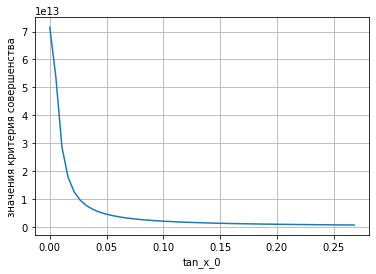

In [12]:
import matplotlib.pyplot as plt

"""[1.5535688773931103e+20, 
 [0.0915868654036083, 0.005081463387808964, 0.09742321259763562, 0.0, 0.03136986401250597], 
 [0.13479425564391845, 0.0033452139984337906, 0.030042170553196468, 0.0, 0.328136571472146], 
 [0.0974, 0.05, 0.16]]"""
# параметры крыльев
params_krr =  np.array([0.0915868654036083, 0.005081463387808964, 0.09742321259763562, 0.0, 0.03136986401250597])

# ограничение по длине: 0.04...0.115
# ограничение по площади: 0.002336 ... 0.010564
# ограничение по бортовой хорде: 0.065 ... 0.105
# ограничение по расстоянию до кормового среза: 0.0 ... 0.032
# 

# параметры рулей


# ограничение по длине: 0.05...0.18
# ограничение по площади: 0.002 ... 0.0052
# ограничение по корневой хорде: 0.02 ... 0.034
# ограничение по расстоянию от носика: 0.328 ... 0.0356
# 

# параметры корпуса

params_kr = []
params_op = []
params_korp=[]
fost = []
l_krss = []
krat = 50
dob = (0.05 - 0.04) / krat
for ost in range(krat+1):
    # print(ost * 0.002586)
    elem = 0.04 + ost * dob
    l_krss.append(ost * 0.268 /krat)
    params_kr = ([0.0915868654036083, 0.005081463387808964, 0.09742321259763562, 0, 0.03136986401250597])
    params_op = ([0.13479425564391845, 0.0033452139984337906, 0.030042170553196468, 0, 0.328136571472146])
    params_korp = ([0.0974, 0.05, elem])
    fost.append(foo(params_kr, params_op, params_korp) / (1 + ost ** 2) * ( (2 + ost) * 10 ** 10))
"""gog = [0.0915868654036083, 0.005081463387808964, 0.09742321259763562, 0.0, 0.03136986401250597]
params_kr.append(gog)
params_op.append([0.13479425564391845, 0.0033452139984337906, 0.030042170553196468, 0.0, 0.328136571472146])
params_korp.append([0.0974, 0.05, 0.16])
l_krss.append(0.0915868654036083)"""

#futures = cl.map(foo, params_kr, params_op, params_korp, pure=False)
#results = cl.gather(futures)
plt.plot(l_krss, fost)
#plt.semilogy(l_krss, results)
plt.grid(True)
#print(l_krss)
#plt.axis([0., 0.268, 0, 3576])
plt.ylabel('значения критерия совершенства')
plt.xlabel('tan_x_0')
plt.savefig("tan_op", dpi = 400)
plt.show()

In [32]:
results

[0.17729184765240075,
 0.17411963825829938,
 0.18450736300928233,
 0.20841618091014932,
 0.24588695658451198,
 61140921.41105549,
 88231527.13433647,
 18875161.177636884,
 3010817.380668975,
 1357428.1669596185,
 583018.9086711188,
 343973.60282556224,
 267423.4352646556,
 358920.0418403175,
 621332.9372084653,
 1698386.861297511,
 6432526.3762978455,
 34203854.79061585,
 53320332.77052912,
 2859938623.066672,
 41411807238594.91,
 75612060.28773704,
 1319394.9879778693,
 97734.619350357,
 16089.62520794915,
 2638.402857097771,
 593.4367842291617,
 166.79445833142768,
 49.68924413993194,
 21.1537340382317,
 1.5535688773931103e+20]